In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn; seaborn.set()

In [2]:
Beads_range=[x for x in range(10,50,4) if x not in (38,46)]
Frac_range=[x/100 for x in range(0,100,25) if x!=0]
Dens_range=[x/100 for x in range(0,81,5) if x>0]
polymers = 1000

In [ ]:
def Data(file, frac, bead):
    
    n_pho = int(bead*abs(frac-1))
    n_phi = bead-n_pho
    data = pd.read_table(file, sep='\s+', header = 1)
    
    X = pd.Series([round(data['x'][part:part+bead].mean(),5) for part in range(0,bead*polymers,bead)])
    Y = pd.Series([round(data['y'][part:part+bead].mean(),5) for part in range(0,bead*polymers,bead)])
    Z = pd.Series([round(data['z'][part:part+bead].mean(),5) for part in range(0,bead*polymers,bead)])    
    
    X0 = pd.Series([round(data.loc[data.type == 0, 'x'][part:part+n_phi].mean(),5) for part in range(0,n_phi*polymers,n_phi)])
    Y0 = pd.Series([round(data.loc[data.type == 0, 'y'][part:part+n_phi].mean(),5) for part in range(0,n_phi*polymers,n_phi)])
    Z0 = pd.Series([round(data.loc[data.type == 0, 'z'][part:part+n_phi].mean(),5) for part in range(0,n_phi*polymers,n_phi)])    
    
    X1 = pd.Series([round(data.loc[data.type == 1, 'x'][part:part+n_pho].mean(),5) for part in range(0,n_pho*polymers,n_pho)])
    Y1 = pd.Series([round(data.loc[data.type == 1, 'y'][part:part+n_pho].mean(),5) for part in range(0,n_pho*polymers,n_pho)])
    Z1 = pd.Series([round(data.loc[data.type == 1, 'z'][part:part+n_pho].mean(),5) for part in range(0,n_pho*polymers,n_pho)])        
    
    return X, Y, Z, X0, Y0, Z0, X1, Y1, Z1

In [3]:
def RG(file, frac, bead):
    
    n_phi = bead - int(bead*abs(frac-1))
    
    data = pd.read_table(file, sep='\s+', header = 1)
    
    philic_chain = pd.Series([data.loc[data.type == 1, ['x','y','z']][part:part+n_phi]\
                              for part in range(0,n_phi*polymers,n_phi)])
    
    rg = 0
    
    for chain in philic_chain:
        for mon in chain['x']:
            rg += ((chain.mean()[0]-mon)**2)
        for mon in chain['y']:
            rg += ((chain.mean()[1]-mon)**2)
        for mon in chain['z']:
            rg += ((chain.mean()[2]-mon)**2)
            
    return (rg/n_phi/polymers)

In [ ]:
def prepend_line(file_name, line):    
    dummy_file = file_name + '.bak'
    
    with open(file_name, 'r') as read_obj, open(dummy_file, 'w') as write_obj:
        write_obj.write(str(line) + '\n')
        for line in read_obj:
            write_obj.write(line)
            
    os.remove(file_name)
    os.rename(dummy_file, file_name)

In [ ]:
def RDFer(Beads, Fracs, Denss):
    
    for Bead in Beads:
            
            for Frac in Fracs:
                
                frac = int((1-Frac)*10%10)
                
                for Dens in Denss:      
                    
                    File = f'frac_{Frac}/m_{Bead}/d_{Dens}/final_snapshot.xyz'
                    
                    x, y, z, x0, y0, z0, x1, y1, z1 = Data(File, Frac, Bead)
                    
                    CM = pd.DataFrame({'Type':2, 'X_cm':x, 'Y_cm':y, 'Z_cm':z})
                    CM0 = pd.DataFrame({'Type':0, 'X_cm':x0, 'Y_cm':y0, 'Z_cm':z0})
                    CM1 = pd.DataFrame({'Type':1, 'X_cm':x1, 'Y_cm':y1, 'Z_cm':z1})
                    
                    file = 'centros_de_massas/chain_cm/f_'+str(frac)+'-b_'+str(Bead)+'-d_'+str(Dens)+'.xyz'
                    file0 = 'centros_de_massas/blocos_filicos/f_'+str(frac)+'-b_'+str(Bead)+'-d_'+str(Dens)+'.xyz'                        
                    file1 = 'centros_de_massas/blocos_fobicos/f_'+str(frac)+'-b_'+str(Bead)+'-d_'+str(Dens)+'.xyz'
                    
                    CM.to_csv(file, index=None, sep=' ', mode='w')
                    CM0.to_csv(file0, index=None, sep=' ', mode='w')
                    CM1.to_csv(file1, index=None, sep=' ', mode='w')
                    
                    prepend_line(file, polymers)
                    prepend_line(file0, polymers)
                    prepend_line(file1, polymers)
                    
                    print(Bead, Frac, Dens,'thank you, next')

In [ ]:
RDFer(Beads_range,Frac_range,Dens_range)

In [4]:
def RGer(Beads, Fracs, Denss):
    
    for Frac in Fracs:
                
        frac = int((1-Frac)*10%10)
        
        RGS = pd.DataFrame(index=Denss)
    
        for Bead in Beads:
            
            rgs = []

            for Dens in Denss:      

                File = f'frac_{Frac}/m_{Bead}/d_{Dens}/final_snapshot.xyz'

                rg = RG(File, Frac, Bead)

                rgs.append(rg)

                print(Bead, Frac, Dens,'thank you, next')                

            RGS[Bead] = rgs
        
        RGS.to_csv(f'RG_of_philic_chains-frac_{frac}.csv', index=None, mode='w')

In [5]:
RGer(Beads=Beads_range, Fracs=Frac_range, Denss=Dens_range)

10 0.25 0.05 thank you, next
10 0.25 0.1 thank you, next
10 0.25 0.15 thank you, next
10 0.25 0.2 thank you, next
10 0.25 0.25 thank you, next
10 0.25 0.3 thank you, next
10 0.25 0.35 thank you, next
10 0.25 0.4 thank you, next
10 0.25 0.45 thank you, next
10 0.25 0.5 thank you, next
10 0.25 0.55 thank you, next
10 0.25 0.6 thank you, next
10 0.25 0.65 thank you, next
10 0.25 0.7 thank you, next
10 0.25 0.75 thank you, next
10 0.25 0.8 thank you, next
14 0.25 0.05 thank you, next
14 0.25 0.1 thank you, next
14 0.25 0.15 thank you, next
14 0.25 0.2 thank you, next
14 0.25 0.25 thank you, next
14 0.25 0.3 thank you, next
14 0.25 0.35 thank you, next
14 0.25 0.4 thank you, next
14 0.25 0.45 thank you, next
14 0.25 0.5 thank you, next
14 0.25 0.55 thank you, next
14 0.25 0.6 thank you, next
14 0.25 0.65 thank you, next
14 0.25 0.7 thank you, next
14 0.25 0.75 thank you, next
14 0.25 0.8 thank you, next
18 0.25 0.05 thank you, next
18 0.25 0.1 thank you, next
18 0.25 0.15 thank you, next
18

18 0.75 0.25 thank you, next
18 0.75 0.3 thank you, next
18 0.75 0.35 thank you, next
18 0.75 0.4 thank you, next
18 0.75 0.45 thank you, next
18 0.75 0.5 thank you, next
18 0.75 0.55 thank you, next
18 0.75 0.6 thank you, next
18 0.75 0.65 thank you, next
18 0.75 0.7 thank you, next
18 0.75 0.75 thank you, next
18 0.75 0.8 thank you, next
22 0.75 0.05 thank you, next
22 0.75 0.1 thank you, next
22 0.75 0.15 thank you, next
22 0.75 0.2 thank you, next
22 0.75 0.25 thank you, next
22 0.75 0.3 thank you, next
22 0.75 0.35 thank you, next
22 0.75 0.4 thank you, next
22 0.75 0.45 thank you, next
22 0.75 0.5 thank you, next
22 0.75 0.55 thank you, next
22 0.75 0.6 thank you, next
22 0.75 0.65 thank you, next
22 0.75 0.7 thank you, next
22 0.75 0.75 thank you, next
22 0.75 0.8 thank you, next
26 0.75 0.05 thank you, next
26 0.75 0.1 thank you, next
26 0.75 0.15 thank you, next
26 0.75 0.2 thank you, next
26 0.75 0.25 thank you, next
26 0.75 0.3 thank you, next
26 0.75 0.35 thank you, next
26

In [9]:
def grafic(Frac,Dens):
    
    for frac in Frac:
        frac =int((1-frac)*10%10)
    
        data = pd.read_csv(f'RG_of_philic_chains-frac_{frac}.csv')
        
        fig, ax = plt.subplots(figsize=(10,8))
        
        y0=data['10']; ax.plot(Dens,y0,label='10 beads', marker='o', linestyle='dashed', linewidth=2, markersize=8); 
        y1=data['14']; ax.plot(Dens,y1,label='14 beads', marker='o', linestyle='dashed', linewidth=2, markersize=8); 
        y2=data['18']; ax.plot(Dens,y2,label='18 beads', marker='o', linestyle='dashed', linewidth=2, markersize=8);
        y3=data['22']; ax.plot(Dens,y3,label='22 beads', marker='o', linestyle='dashed', linewidth=2, markersize=8);
        y4=data['26']; ax.plot(Dens,y4,label='26 beads', marker='o', linestyle='dashed', linewidth=2, markersize=8);
        y5=data['30']; ax.plot(Dens,y5,label='30 beads', marker='o', linestyle='dashed', linewidth=2, markersize=8);
        y6=data['34']; ax.plot(Dens,y6,label='34 beads', marker='o', linestyle='dashed', linewidth=2, markersize=8);
        y7=data['42']; ax.plot(Dens,y7,label='42 beads', marker='o', linestyle='dashed', linewidth=2, markersize=8);
        
        ax.set_xlabel('Densities'); ax.set_ylabel('Rg²')
        ax.set_title(f'frac {frac}')
        ax.legend(loc=0, ncol=1)
        fig.savefig(f'RG_of_philic_chains-frac_{frac}.png')
        fig.show()

<ipython-input-9-3e2294a75d43>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-3e2294a75d43>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-9-3e2294a75d43>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


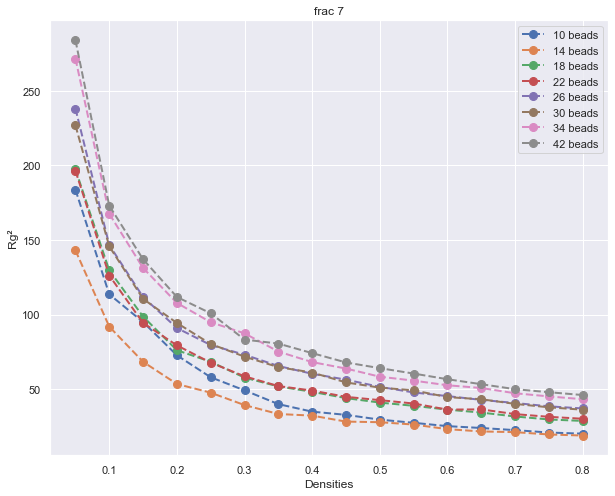

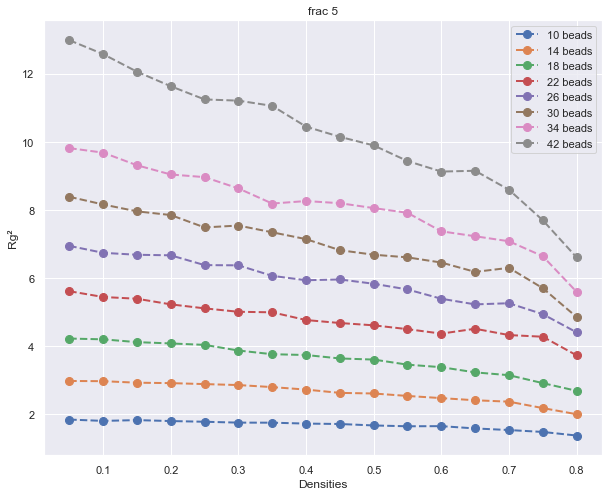

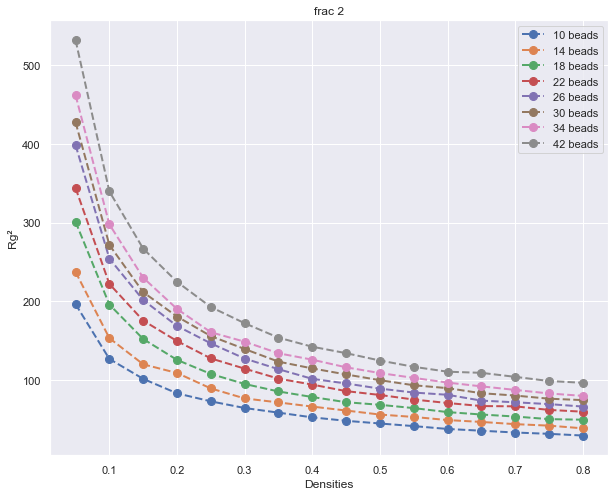

In [10]:
grafic(Frac_range, Dens_range)